# **Deep Learning Take Home Assignment**

Converting an interview into an offer is a long process. While it may involve various rounds of discussions, we are often given take-home assignments to test our skills on a near real world problem in the preliminary rounds. Although it's a very good way to judge a candidate's proficiency in solving a problem, it may be time consuming and sometimes very frustrating when no feedback is given after hours of hard work.

But anyway, in this Deep Learning Interview process, we are given a food classification dataset which has 101 classes. Data Source: https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/

We need to analyze and preprocess the dataset as well as build deep learning models for performing food classification. We are free to choose any Deep Learning framework out there.

As, this dataset is already present at `tensorflow_datasets` and can be easily downloaded as a `tfds` as shown https://www.tensorflow.org/datasets/catalog/food101  . But, we will download raw data and then preprocess it according to our needs to showcase technical skills as real world data may come in any shape and size.



Judging criteria would be how to format raw data and put in respective directories to be able to fed to model, create train-test split, data visualization, data preprocessing, data augmnetation, input pipelines, modeling (transfer learning, fine tuning), validation, metrics visualization, inference etc.  

Bonus: You may get extra points for *Deployment*

```
connect with me at-
blog- https://rahulbakshee.github.io/iWriteHere/
linkedin - https://www.linkedin.com/in/rahulbakshee/
twitter - https://twitter.com/rahulbakshee
github - https://github.com/rahulbakshee
```

# 1. download the data
We download raw data from source and unzip it.

In [ ]:
# download raw data
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz

--2022-02-08 18:48:24--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2022-02-08 18:48:24--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  26.5MB/s    in 3m 8s   

2022-02-08 18:51:33 (25.3 MB/s) - ‘food-101.tar.gz’ saved [4996278331/4996278331]



In [ ]:
# unzip the data
!tar xzf food-101.tar.gz #add v for verbose #xvzf

In [ ]:
!ls food-101

images	license_agreement.txt  meta  README.txt


In [ ]:
# list all the subdirectories(101 classes of food) under "/images"
!ls food-101/images

apple_pie	    eggs_benedict	     onion_rings
baby_back_ribs	    escargots		     oysters
baklava		    falafel		     pad_thai
beef_carpaccio	    filet_mignon	     paella
beef_tartare	    fish_and_chips	     pancakes
beet_salad	    foie_gras		     panna_cotta
beignets	    french_fries	     peking_duck
bibimbap	    french_onion_soup	     pho
bread_pudding	    french_toast	     pizza
breakfast_burrito   fried_calamari	     pork_chop
bruschetta	    fried_rice		     poutine
caesar_salad	    frozen_yogurt	     prime_rib
cannoli		    garlic_bread	     pulled_pork_sandwich
caprese_salad	    gnocchi		     ramen
carrot_cake	    greek_salad		     ravioli
ceviche		    grilled_cheese_sandwich  red_velvet_cake
cheesecake	    grilled_salmon	     risotto
cheese_plate	    guacamole		     samosa
chicken_curry	    gyoza		     sashimi
chicken_quesadilla  hamburger		     scallops
chicken_wings	    hot_and_sour_soup	     seaweed_salad
chocolate_cake	    hot_dog		     shrimp_and_grits
chocolate_mousse    huevo

In [ ]:
# README.txt shows how the directory structure
!cat food-101/README.txt

Readme

Structure:
----------
pec/
    images/
        <class_name>/
            <image_id>.jpg
    meta/
        classes.txt
        labels.txt
        test.json
        test.txt
        train.json
        train.txt

All images can be found in the "images" folder and are organized per class. All
image ids are unique and correspond to the foodspotting.com review ids. Thus
the original articles can retrieved trough
  http://www.foodspotting.com/reviews/<image_id>
or through the foodspotting api (http://www.foodspotting.com/api).

The test/train splitting used in the experiment of our paper, can be found in
the "meta" directory.

For any questions contact bossard@vision.ee.ethz.ch



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sys, gc, os, shutil, PIL
from tqdm.notebook import tqdm
seed = 42

import tensorflow as tf
print("tensorflow version", tf.__version__)

AUTOTUNE = tf.data.experimental.AUTOTUNE
tf.config.list_physical_devices('GPU')

tensorflow version 2.7.0


[]

In [ ]:
base_dir = "food-101/"

os.listdir(base_dir)

['README.txt', 'images', 'meta', 'license_agreement.txt']

In [ ]:
# list the number of classes
labels = []

with open (base_dir+"meta/classes.txt", 'r') as file:
    for cls in tqdm(file):
        labels.append(cls[:-1])
    
print("[INFO] Total number of classes", len(labels))
# print(labels)

0it [00:00, ?it/s]

[INFO] Total number of classes 101


# 2. Create train and test subdirectories 
Create train/test subdirectories containing set of images to be fed into model.

In [ ]:
def create_train_test(folder):
    """ 
    creates subfolders for train and test under root dir
    copies files from subfolders(classes) under "/images" to subfolders of "/train" & "/test
    
    """

    # creates subfolders for train and test under root dir
    for cls in labels:
        os.makedirs(base_dir + folder + '/' + cls)
    
    # copies image files
    with open (base_dir+"meta/" + folder + ".txt", 'r') as file:
        for f in tqdm(file) :
            shutil.move(src=base_dir+"images/" + f[:-1]+ ".jpg", 
                        dst=base_dir+folder+"/" + f[:-1]+ ".jpg" )

            
create_train_test(folder="train" )
print("[INFO] subfolders created for train data")
create_train_test(folder="test" )
print("[INFO] subfolders created for test data")

0it [00:00, ?it/s]

[INFO] subfolders created for train data


0it [00:00, ?it/s]

[INFO] subfolders created for test data


In [ ]:
# see the newly created train/test folders
os.listdir(base_dir)

['test', 'README.txt', 'images', 'meta', 'license_agreement.txt', 'train']

# 3. List number of samples in training and testing folders.

The list is too long...so this piece of code just prints total number of samples. 


If we want to list all the files, we can set 
**list_files = True**

In [ ]:
def list_and_count_files(folder, list_files=False):
    """ 
    lists number of samples in training and testing folders
    
    """
    counter = 0
    for root, dirs, files in os.walk(base_dir + folder + "/"):
        for file in files:
            if list_files:
                print(os.path.join(root,file))
        counter += len(files)
    print("[INFO] Total number of samples in {} folder".format(folder), counter)

# avoiding printing the all the file names in the display
# set list_files to true if needed to print file names
list_and_count_files(folder="train",list_files=False)
list_and_count_files(folder="test",list_files=False)

[INFO] Total number of samples in train folder 75750
[INFO] Total number of samples in test folder 25250


# 4. Plot sample images from training and testing folders.
This function plots images of random classes from subdirectory. 

In [ ]:
def display_images(folder):
    """
    plots sample images from training and testing datasets.
    """
    _, axes_list = plt.subplots(5, 7, figsize=(15,10))
    for axes in axes_list:
        for ax in axes:
            ax.axis('off')
            lbl = np.random.choice(os.listdir(base_dir+folder+"/"))
            img = np.random.choice(os.listdir(base_dir+folder+"/" + lbl))
            ax.imshow(PIL.Image.open(base_dir+folder+"/" + lbl+"/"+img))
            ax.set_title(lbl)

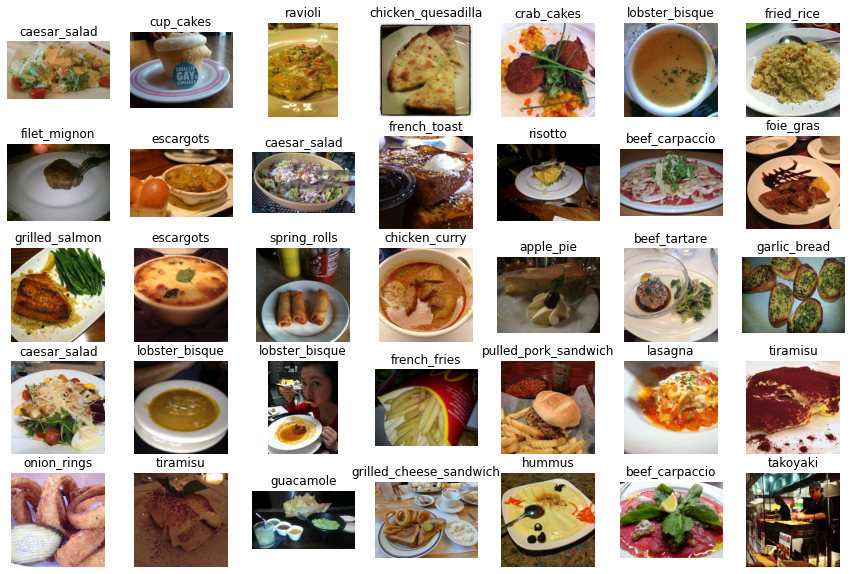

In [ ]:
display_images(folder="train")

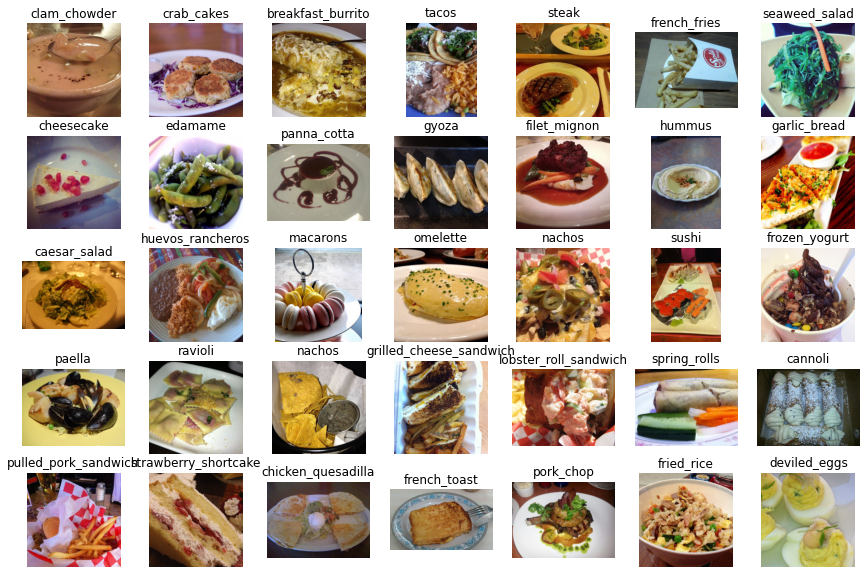

In [ ]:
display_images(folder="test")

# 5. create the train, val, test datasets out of train and test
Create train, val and test datasets for model fitting, validation and inference

In [ ]:
# params
IMG_SIZE = (200, 200) # keep it low to avoid colab crashing
IMG_SHAPE = IMG_SIZE + (3,)
NUM_CLASSES = 101
BATCH_SIZE = 32
INITIAL_EPOCHS = 10
FINE_TUNE_EPOCHS = 10
TOTAL_EPOCHS = INITIAL_EPOCHS + FINE_TUNE_EPOCHS

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dataset = image_dataset_from_directory(os.path.join(base_dir,"train"),
                                            batch_size=BATCH_SIZE,
                                            image_size=IMG_SIZE,
                                            shuffle=True,
                                            seed=seed,
                                            validation_split=0.2,
                                            subset="training")


val_dataset = image_dataset_from_directory(os.path.join(base_dir,"train"),
                                            batch_size=BATCH_SIZE,
                                            image_size=IMG_SIZE,
                                            shuffle=True,
                                            seed=seed,
                                            validation_split=0.2,
                                            subset="validation")


test_dataset = image_dataset_from_directory(os.path.join(base_dir,"test"),
                                            batch_size=BATCH_SIZE,
                                            image_size=IMG_SIZE,
                                            shuffle=True,
                                            seed=seed)

Found 75750 files belonging to 101 classes.
Using 60600 files for training.
Found 75750 files belonging to 101 classes.
Using 15150 files for validation.
Found 25250 files belonging to 101 classes.


# 6. augment the data
Data Augmentation is allowing random manipulations to the input data for training so as to avoid overfitting and giving our model enough variations to generalize well on unseen test data.

Adding a few layers at the start of input pipeline should do the job.

In [ ]:
# craete a tensorflow layer for augmentation
data_augmentation = tf.keras.models.Sequential([
                                    tf.keras.layers.RandomFlip('horizontal'),
                                    tf.keras.layers.RandomRotation(0.2),
                                    tf.keras.layers.RandomZoom(0.2)
                                            ])

# 7. Preview the augmented dataset.

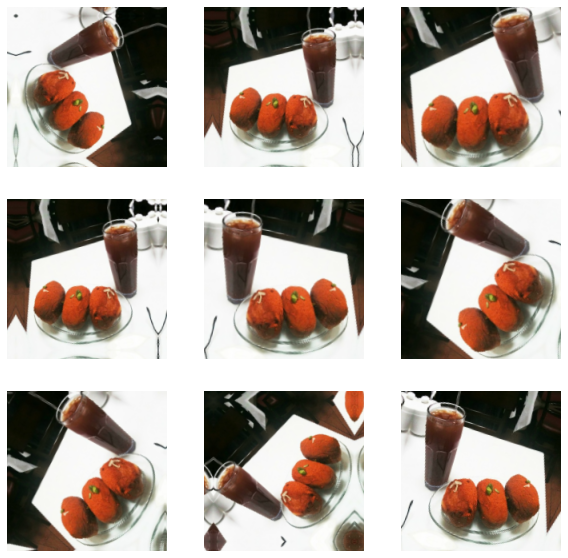

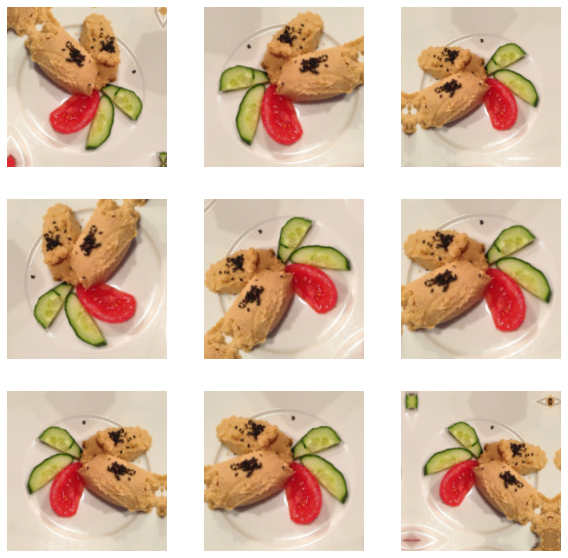

In [ ]:
for image, _ in train_dataset.take(2):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

# 8. configure dataset for performance
TensorFlow provides great ways to optimize your data pipelines by prefetching data and keeping it ready to be used.

In [ ]:
train_dataset = train_dataset.shuffle(500).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

# 9. load pretrained model for transfer learning
We will use `InceptionV3` as pretrained model with `imagenet` weights and without the final layer. For now we will freeze all the layers and train only the final Dense layer.

In [ ]:
# Create the base model from the pre-trained model
base_model = tf.keras.applications.inception_v3.InceptionV3(
                                                        include_top=False, 
                                                        weights='imagenet', 
                                                        input_shape=IMG_SHAPE
                                                            )
print("[INFO] Number of layers in the base model ", len(base_model.layers))

# freeze the base model
base_model.trainable = False

# print the base model summary
# print(base_model.summary())

[INFO] Number of layers in the base model  311


# 10. add dense layers on top of pretrained model
Time to compile and run the model.

In [ ]:
inputs = tf.keras.layers.Input(shape=IMG_SHAPE)
x = data_augmentation(inputs)
x = tf.keras.applications.inception_v3.preprocess_input(x)
x = base_model(x, training=False) # training=False needed for batchnorm layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')(x)

model = tf.keras.models.Model(inputs, outputs)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 200, 200, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 200, 200, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 200, 200, 3)      0         
 a)                                                              
                                                                 
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0     

In [ ]:
reduceLROnPlateau = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',
                                                        factor=0.1,
                                                        patience=1,
                                                        verbose=1)
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                 patience=5)
checkpoint = tf.keras.callbacks.ModelCheckpoint(os.path.join(base_dir,'base_model.h5'),
                                                        monitor='val_accuracy',
                                                        save_best_only=True)

# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# train the model
history = model.fit(train_dataset,
                    batch_size=BATCH_SIZE,
                    epochs=INITIAL_EPOCHS,
                    #callbacks=[reduceLROnPlateau,earlyStopping,checkpoint], 
                    validation_data=val_dataset)

Epoch 1/10
1894/1894 [==============================] - 409s 177ms/step - loss: 3.5875 - accuracy: 0.2638 - val_loss: 2.6918 - val_accuracy: 0.3991
Epoch 2/10
1894/1894 [==============================] - 372s 173ms/step - loss: 3.2828 - accuracy: 0.3217 - val_loss: 2.7271 - val_accuracy: 0.4028
Epoch 3/10
1894/1894 [==============================] - 372s 173ms/step - loss: 3.2589 - accuracy: 0.3339 - val_loss: 2.6589 - val_accuracy: 0.4164
Epoch 4/10
1894/1894 [==============================] - 374s 174ms/step - loss: 3.2447 - accuracy: 0.3414 - val_loss: 2.6924 - val_accuracy: 0.4156
Epoch 5/10
1894/1894 [==============================] - 375s 174ms/step - loss: 3.2572 - accuracy: 0.3412 - val_loss: 2.6843 - val_accuracy: 0.4209
Epoch 6/10
1894/1894 [==============================] - 375s 175ms/step - loss: 3.2672 - accuracy: 0.3448 - val_loss: 2.7223 - val_accuracy: 0.4234
Epoch 7/10
1894/1894 [==============================] - 380s 175ms/step - loss: 3.2667 - accuracy: 0.3478 - val_

**as seen above the loss/val_loss still improving, one should try to add more epochs to training**

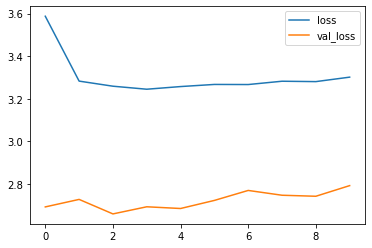

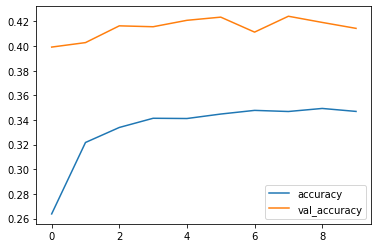

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()

# 11. fine tuning

This step involves opening our model for modifications based on the new data. We would mark few of the top layers as "trainable" and try to train the model with lower learning rate than before so that "pretrained" weights don't get modified too much. We only want small updates in the pretrained weights.

In [ ]:
# un-freeze the model
base_model.trainable = True

# Fine-tune from this layer onwards
fine_tune_at = 250

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False

print("Number of layers in the base model: ", len(base_model.layers))
print("Number of trainable layers in the base model: ", len(base_model.layers)-250)

Number of layers in the base model:  311
Number of trainable layers in the base model:  61


In [ ]:
# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
             loss='sparse_categorical_crossentropy', 
             metrics=['accuracy'])
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 200, 200, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 200, 200, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 200, 200, 3)      0         
 a)                                                              
                                                                 
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0     

In [ ]:
# train
history_fine = model.fit(train_dataset,
                        batch_size=BATCH_SIZE,
                        epochs= TOTAL_EPOCHS,
                        #initial_epoch=history.epoch[-1],
                        #callbacks=[reduceLROnPlateau], #can add others too
                        validation_data=val_dataset)

Epoch 1/20
1894/1894 [==============================] - 455s 209ms/step - loss: 2.2772 - accuracy: 0.4385 - val_loss: 1.9765 - val_accuracy: 0.5065
Epoch 2/20
1894/1894 [==============================] - 440s 209ms/step - loss: 2.0610 - accuracy: 0.4781 - val_loss: 1.9074 - val_accuracy: 0.5245
Epoch 3/20
1894/1894 [==============================] - 438s 207ms/step - loss: 1.9432 - accuracy: 0.5026 - val_loss: 1.8487 - val_accuracy: 0.5374
Epoch 4/20
1894/1894 [==============================] - 438s 207ms/step - loss: 1.8575 - accuracy: 0.5228 - val_loss: 1.7981 - val_accuracy: 0.5495
Epoch 5/20
1894/1894 [==============================] - 440s 208ms/step - loss: 1.7833 - accuracy: 0.5404 - val_loss: 1.7702 - val_accuracy: 0.5554
Epoch 6/20
1894/1894 [==============================] - 439s 208ms/step - loss: 1.7152 - accuracy: 0.5545 - val_loss: 1.7483 - val_accuracy: 0.5624
Epoch 7/20
1894/1894 [==============================] - 439s 208ms/step - loss: 1.6525 - accuracy: 0.5680 - val_

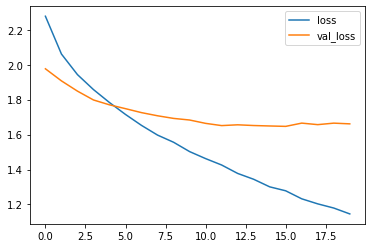

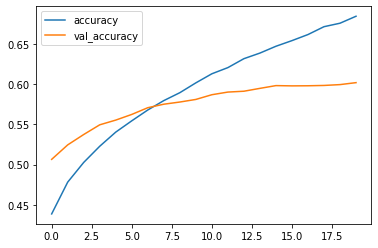

In [ ]:
history_frame = pd.DataFrame(history_fine.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()

# 12. evaluate on test dataset

In [ ]:
# Evaluation and prediction
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

790/790 [==============================] - 122s 152ms/step - loss: 1.3641 - accuracy: 0.6474
Test accuracy : 0.6474059224128723


# 13. deploy to gradio
Gradio is the fastest way to demo your machine learning model with a friendly web interface so that anyone can use it, anywhere!


In [ ]:
!pip install gradio -q

     |████████████████████████████████| 871 kB 5.5 MB/s 
     |████████████████████████████████| 1.1 MB 35.6 MB/s 
     |████████████████████████████████| 52 kB 1.1 MB/s 
     |████████████████████████████████| 2.0 MB 7.5 MB/s 
     |████████████████████████████████| 210 kB 28.3 MB/s 
     |████████████████████████████████| 52 kB 460 kB/s 
     |████████████████████████████████| 271 kB 28.1 MB/s 
     |████████████████████████████████| 94 kB 1.1 MB/s 
     |████████████████████████████████| 144 kB 26.6 MB/s 
     |████████████████████████████████| 10.9 MB 17.7 MB/s 
     |████████████████████████████████| 58 kB 3.8 MB/s 
     |████████████████████████████████| 79 kB 5.2 MB/s 
     |████████████████████████████████| 3.6 MB 38.7 MB/s 
     |████████████████████████████████| 856 kB 40.3 MB/s 
     |████████████████████████████████| 61 kB 372 kB/s 
     |████████████████████████████████| 58 kB 4.6 MB/s 


In [ ]:
import gradio as gr

def classify_image(inp):
  inp = inp.reshape((-1,) + IMG_SHAPE)
  inp = tf.keras.applications.inception_v3.preprocess_input(inp)
  prediction = model.predict(inp).flatten()
  return {labels[i]: float(prediction[i]) for i in range(101)}

image = gr.inputs.Image(shape=IMG_SIZE)
label = gr.outputs.Label(num_top_classes=3)

gr.Interface(fn=classify_image, inputs=image, outputs=label, interpretation="default").launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://10831.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


# 14. Conclusion
The reason for low Train/Test accuracy is because I used all of the Images and classes(101) So, I experimented and had to reduce the image size to 200x200 to avoid crashing of colab.

I experimented to keep higher batch size also, but had to keep small batch size (32) to avoid colab crashing. One can try to experiment and emeber to tweek the **cache/shuffle/prefetch** accordingly.

Also I ran the experiment for 10 epochs only. As this is a huge dataset, it would be advised to run for more epochs with larger input shape.

Training from scratch would need more compute power, that's why I went ahead with transfer learning, but one can try that also.

Try with different pretrained models.

Adding more compute power (**colab pro**) would definitely help to prototype/train faster 

I ran this using **GPU** but one can experiment using **TPU** also.

One can also try to unfreeze whole pretrained model and try to train it with very low learning rate.

Trying different optimizers and callbacks(learning rate schedulers, early stopping etc.) might help improve metrics and run time.